# Loan Prediction using Neural Network

There are 2 steps for performing loan prediction with the help of a neural network: 
1. **Data Preprocessing:**
    - Filling the missing values.
    - Converting categories to numbers.
    - Bring all the variables in range 0 to 1.
2. **Model Training:**
    - Use the Tensorflow / Keras modules and libraries for training the model.
  
## Importing libraries

In [13]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# check version on pandas
print('Version of pandas:', pd.__version__)
print('Version of numpy:', np.__version__)

Version of pandas: 2.1.3
Version of numpy: 1.26.1


## Data Preprocessing 
### Importing and loading data

In [2]:
# Reading the loan prediction data
data = pd.read_csv('datasets/loan_data.csv')

# Check the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# shape and columns of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (614, 13)
Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
# checking missing values in the data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# data types of the variables
print(data.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


### Handling missing values

#### Categorical data with mode

In [9]:
# filling missing values of categorical variables with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

#### Continuous data with mean

In [8]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [10]:
# checking missing values after imputation
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Converting categories to numbers

In [11]:
# Converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

# Check the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Feature scaling (between 0 to 1)

In [12]:
# bringing variables in the range 0 to 1
data['Dependents'] = (data['Dependents'] - data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

# applying for loop to bring all the variables in range 0 to 1
for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

# again looking at first five rows of pre-processed data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# saving the pre-processed data
data.to_csv('datasets/loan_prediction_data.csv', index = False)

## Model training

Build the model with the help of Keras.

### Load the preprocessed data

In [14]:
# loading the pre-processed dataset
data = pd.read_csv('datasets/loan_prediction_data.csv')

# Check the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [15]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [17]:
# looking at the columns and shape of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (614, 12)
Columns: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [18]:
# separating the independent and dependent variables
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

print(X.shape, y.shape)

(614, 11) (614,)


### Create training and testing data

In [19]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# test size = 0.2, 20% testing and 80% training 

# random state to regenerate the same train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data['Loan_Status'], random_state = 10, test_size = 0.2)

# Shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

### Architecture of the model

Install keras with the help of **`!pip install keras`** command. 

In [21]:
#!pip install keras

In [24]:
# Import keras and tensorflow
import keras
import tensorflow as tf

print(tf.__version__)
print(keras.__version__)

2.17.0
3.4.1


#### Create the model

In [25]:
# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense 

# defining input neurons
input_neurons = X_train.shape[1]

# since loan prediction is a binary classification problem, we will have single neuron in the output layer.
# define number of output neurons
output_neurons = 1

# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units = neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units = neuron_hidden_layer_2, activation='relu'))

# since it is a binary classification problem, we have used sigmoid activation function in the final layer
model.add(Dense(units = output_neurons, activation='sigmoid'))

In [26]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# number of parameters between input and first hidden layer
print(input_neurons * neuron_hidden_layer_1)

# adding the bias for each neuron of first hidden layer
print(input_neurons * neuron_hidden_layer_1 + 10)

# number of parameters between first and second hidden layer
print(neuron_hidden_layer_1 * neuron_hidden_layer_2 + 5)

# number of parameters between second hidden and output layer
print(neuron_hidden_layer_2 * output_neurons + 1)

110
120
55
6


#### Compile the model

In [30]:
# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

#### Train the model

In [31]:
# passing the independent and dependent features for training set for training the model
# validation data will be evaluated at the end of each epoch
# setting the epochs as 50# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7149 - loss: 0.6271 - val_accuracy: 0.6911 - val_loss: 0.6466
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6469 - loss: 0.6496 - val_accuracy: 0.6911 - val_loss: 0.6363
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6876 - loss: 0.6166 - val_accuracy: 0.6911 - val_loss: 0.6289
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6665 - loss: 0.6144 - val_accuracy: 0.6911 - val_loss: 0.6224
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7045 - loss: 0.5930 - val_accuracy: 0.6911 - val_loss: 0.6164
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6935 - loss: 0.5980 - val_accuracy: 0.6911 - val_loss: 0.6113
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6825 - loss: 0.5939 - val_accuracy: 0.6911 - val_loss: 0.6067
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7054 - loss: 0.5832 - val_accuracy: 0.6911 - val_loss

#### Predict the model

In [35]:
# getting predictions for the validation set
# prediction = model.predict_classes(X_test)
prediction = model.predict(X_test) 
classes_x = np.argmax(prediction, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


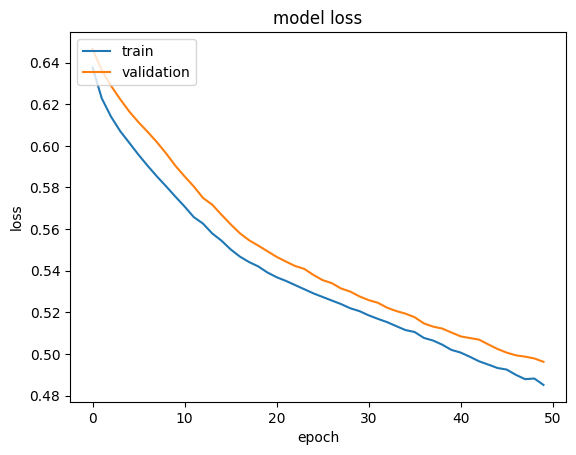

In [39]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

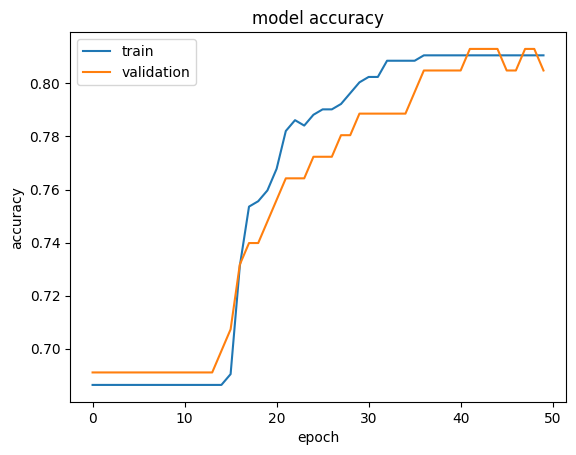

In [41]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')

plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, prediction))

MAE: 0.3347055428638691
